## Procesamiento de Lenguaje Natural

*Proyecto Final: **Modelado de Tópicos*** 

# ***Análisis exploratorio de datos***

### **Equipo:**

- Giottonini Herrera Enrique Alejandro
- Burruel Durán Luis Andrés
- Villalba Miranda Jesús Abraham
- Oscar

**Fuentes**
* Los datos fueron obtenidos de [@nostradata ](https://www.nostrodata.com) en [`GitHub`](https://github.com/NOSTRODATA/conferencias_matutinas_amlo)
---

In [42]:
# Importamos las librerias que utilizaremos
import os
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from matplotlib import pyplot as plt

## **Objetivo**

El propósito es realizar un análisis exploratorio sobre los datos crudos para tener una base en la toma de desiciones con respecto al pre-procesamiento de datos (limpieza, normalización, etc.) para nuestra tarea final, el `modelado de topicos`.

Es importante señalar la estructura de los documentos o datos crudos que estaremos analizando y que formato deseamos como resultado del preprocesamiento para el entrenamiento del modelo que utilizaremos para el modelado de topicos. Los documentos vienen separados en archivos diferentes, en el que cada archivo contiene las mañaneras ocurridas en la semana correspondiente.

Lo que esperamos producir como salida es un archivo `csv` que contenga los **tokens** identificados de la semana despues del preprocesamiento del texto.

### Extracción de información de los archivos

In [1]:
def getData(filename: str) -> str:
    """ Lee y almacena en un string todos los carácteres leídos en un archivo .txt """
    rawData = ""
    with open(filename, encoding="utf-8") as f:
        for line in f:
            rawData += line
    return rawData

In [5]:
available_data_paths = os.listdir(path='../data/')

c:\Users\abrah\OneDrive\Documentos\School\2023_1\PLN\final\topic-modeling\src


In [19]:
df = pd.DataFrame(columns=['text', 'week'])
for file_name in available_data_paths:
    df.loc[len(df)] = [getData(f'../data/{file_name}'), file_name]

In [20]:
df.head()

,text,week
0,"Buenos días. Ánimo. Pues hoy es martes y, com...",semana_1.txt
1,Buenos días. Tardamos porque nos hicieron una...,semana_2.txt
2,"Buenos días. Ánimo, ánimo. Bueno, pues vamos ...",semana_3.txt
3,"Buenos días. Ánimo, esta semana va a estar me...",semana_4.txt
4,"Buenos días. Ánimo, ánimo. Bueno, pues como c...",semana_5.txt


## Estadisticas simples

En esta sección analizaremos información basica de nuestros documentos, como la cantidad de palabras por documento, cantidad de sentencias por documento, etc. 

In [37]:
eda_df = df.copy()
eda_df['words'] = df['text'].apply(lambda x: word_tokenize(x, 'spanish'))
eda_df['sentences'] = df['text'].apply(lambda x: sent_tokenize(x, 'spanish'))
eda_df['num_ch'] = df['text'].apply(lambda x: len(x))

In [38]:
eda_df.head()

,text,week,words,sentences,num_ch
0,"Buenos días. Ánimo. Pues hoy es martes y, com...",semana_1.txt,"[Buenos, días, ., Ánimo, ., Pues, hoy, es, mar...","[ Buenos días., Ánimo., Pues hoy es martes y, ...",87060
1,Buenos días. Tardamos porque nos hicieron una...,semana_2.txt,"[Buenos, días, ., Tardamos, porque, nos, hicie...","[ Buenos días., Tardamos porque nos hicieron u...",59940
2,"Buenos días. Ánimo, ánimo. Bueno, pues vamos ...",semana_3.txt,"[Buenos, días, ., Ánimo, ,, ánimo, ., Bueno, ,...","[ Buenos días., Ánimo, ánimo., Bueno, pues vam...",85030
3,"Buenos días. Ánimo, esta semana va a estar me...",semana_4.txt,"[Buenos, días, ., Ánimo, ,, esta, semana, va, ...","[ Buenos días., Ánimo, esta semana va a estar ...",85533
4,"Buenos días. Ánimo, ánimo. Bueno, pues como c...",semana_5.txt,"[Buenos, días, ., Ánimo, ,, ánimo, ., Bueno, ,...","[ Buenos días., Ánimo, ánimo., Bueno, pues com...",77922


#### Número de caracteres por documento (semana)

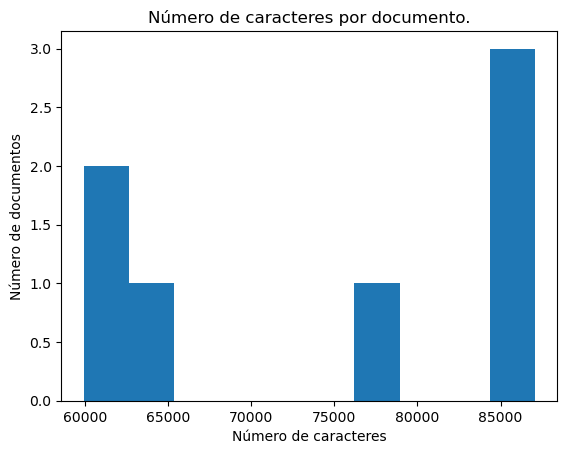

In [39]:
plt.hist(eda_df['num_ch'])
plt.title('Número de caracteres por documento.')
plt.xlabel('Número de caracteres')
plt.ylabel('Número de documentos')
plt.show()

#### Número de palabras por semana.

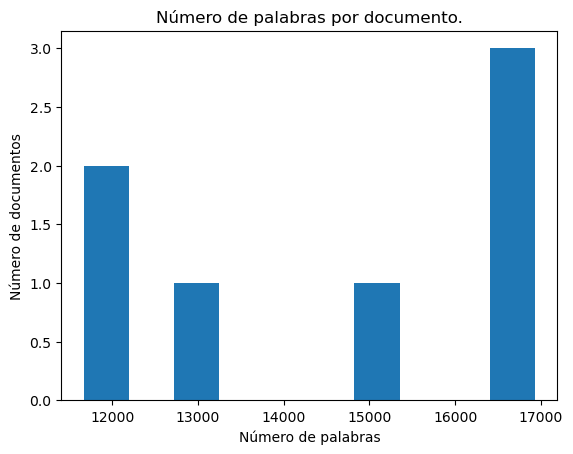

In [40]:
plt.hist(eda_df['words'].apply(lambda x: len(x)))
plt.title('Número de palabras por documento.')
plt.xlabel('Número de palabras')
plt.ylabel('Número de documentos')
plt.show()

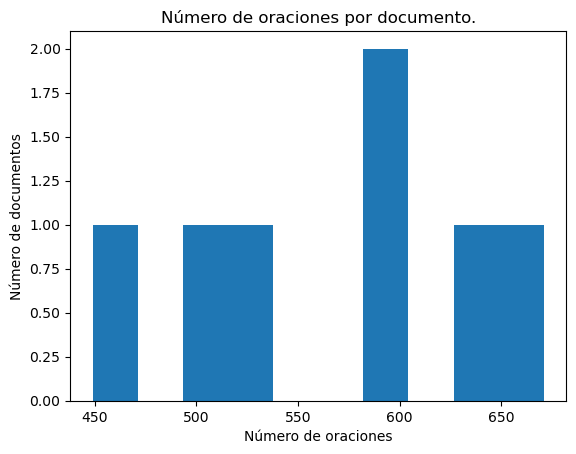

In [41]:
plt.hist(eda_df['sentences'].apply(lambda x: len(x)))
plt.title('Número de oraciones por documento.')
plt.xlabel('Número de oraciones')
plt.ylabel('Número de documentos')
plt.show()

#### Longitud promedio de palabras por documento.

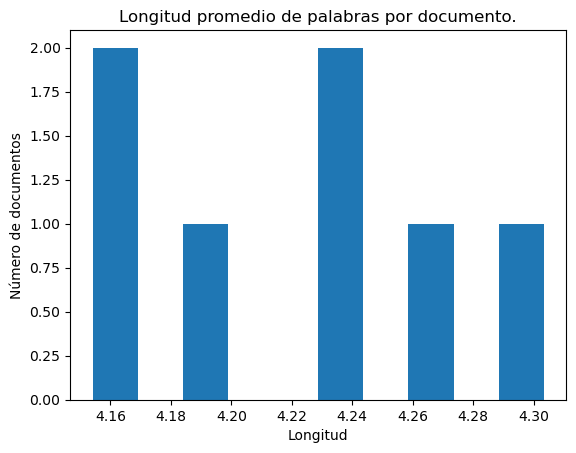

In [48]:
plt.hist(eda_df['words'].apply(lambda x: np.mean([len(i) for i in x])))
plt.title('Longitud promedio de palabras por documento.')
plt.xlabel('Longitud')
plt.ylabel('Número de documentos')
plt.show()